In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,accuracy_score,recall_score,confusion_matrix,mean_squared_error,plot_confusion_matrix

In [2]:
df = pd.read_csv("D:\Manoj\CODE\Python\Machine Learning\Data_Sets\Social_Network_Ads.csv")

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
x = df.iloc[:,2:4]
y = df.iloc[:,4]

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=7)

In [8]:
x_train.shape

(268, 2)

In [9]:
y_train.shape

(268,)

In [10]:
x_test.shape

(132, 2)

In [11]:
y_test.shape

(132,)

In [12]:
model = LogisticRegression()

In [13]:
model.fit(x_train,y_train)

LogisticRegression()

In [14]:
y_pred = model.predict(x_test)

C:\Users\Omkar\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


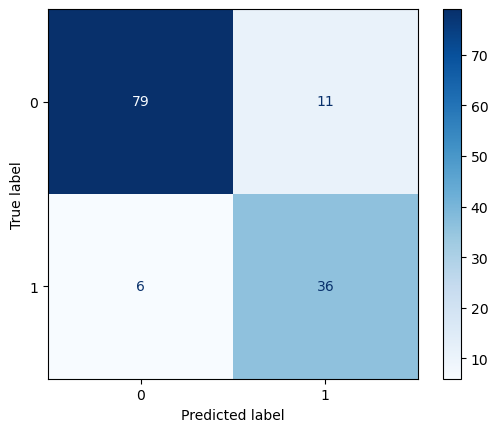

In [15]:
cm = confusion_matrix(y_test,y_pred)
#print(cm)
plot_confusion_matrix(model, x_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [16]:
TP = cm[1,1]
FP = cm[0,1]
TN = cm[0,0]
FN = cm[1,0]

accuracy = (TP+TN)/(TP+FP+TN+FN)
error_rate = 1 - accuracy
precision = TP/(TP+FP)
recall = TP/(TP+FN)

print('Accuracy:', accuracy.round(2))
print('Error rate:', error_rate.round(2))
print('Precision:', precision.round(2))
print('Recall:', recall.round(2))

Accuracy: 0.87
Error rate: 0.13
Precision: 0.77
Recall: 0.86


In [17]:
precision = precision_score(y_test,y_pred)
print(precision.round(2))

0.77


In [18]:
recall = recall_score(y_test,y_pred)
print(recall.round(2))

0.86


In [19]:
accuracy = accuracy_score(y_test,y_pred)
print(accuracy.round(2))

0.87


In [20]:
mse = mean_squared_error(y_test,y_pred)
print(mse.round(2))

0.13
